<a href="https://colab.research.google.com/github/morphingdesign/tfExplore/blob/master/C_to_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Import dependencies and TF
*   Import NumPy for data lists

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

Setup data for training
*   **Feature**: model inputs (C in this ex)
*   **Labels**: model outputs (F in this ex)
*   **Example**: pair of I/O (C & F values at a specific index)



In [3]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

for i, c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


Create model

* Build layer

  * Build layer by instantiating `tf.keras.layers.Dense`

    * Configuration:

      * `input_shape=[1]` : Specifies that input to this layer is a single value. 1D array of a single float representing C
      * `units=1`: Specifies number of neurons in layer. Num of neurons defines how many internal var the layer has to try to learn to solve the problem. Since this is the final layer, it is also the size of the model output, a single float representing F. (In a multi-layer network, size/shape of layer would need to match the `input_shape` of the next layer).
    
* Assemble layers:
 
   * Use Sequential model definition, which takes a list of layers as arg, specifying calculation order from input to output
    
   

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs = 500, verbose = False)
print("Finished training model")

Finished training model


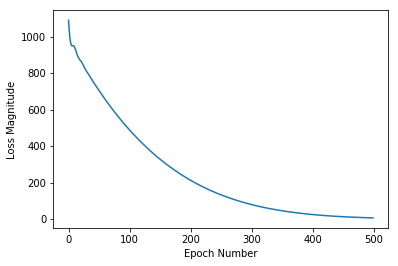

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [10]:
print(model.predict([100.0]))

[[211.33815]]
